# Neural Network Basics: Hand-holding guide with Working Examples

   # PART - 1


   # Author: Bikash Gyawali
   
   # Date: 10 January 2021

## Topics Covered: Gradient Descent

This Page: https://github.com/bikashg/saral-byakhya/blob/master/Neural%20Network/Basic_NN_Part_1.ipynb

Video Description: 

### Section 1: A working Example: Learning to Predict

In [1]:
import numpy as np
import tabletext

In [2]:
X = np.array([-16, -8, -4, -2, 2, 4, 8, 16])
Y = np.array([-112, -56, -28, -14, 14, 28, 56, 112])

test_data =  np.array([32])

data1 = [["Example Number","X","Y"],
        ["i=1",-16,-112],
        ["i=2",-8,-56],
        ["i=3",-4,-28],
        ["i=4",-2,-14],
        ["i=5",2,14],
        ["i=6",4,28],
        ["i=7",8,56],
        ["i=8",16,112],
        ["i=9",32,"???"],
        ]
print(tabletext.to_text(data1))

┌────────────────┬─────┬──────┐
│ Example Number │ X   │ Y    │
├────────────────┼─────┼──────┤
│ i=1            │ -16 │ -112 │
├────────────────┼─────┼──────┤
│ i=2            │  -8 │  -56 │
├────────────────┼─────┼──────┤
│ i=3            │  -4 │  -28 │
├────────────────┼─────┼──────┤
│ i=4            │  -2 │  -14 │
├────────────────┼─────┼──────┤
│ i=5            │   2 │   14 │
├────────────────┼─────┼──────┤
│ i=6            │   4 │   28 │
├────────────────┼─────┼──────┤
│ i=7            │   8 │   56 │
├────────────────┼─────┼──────┤
│ i=8            │  16 │  112 │
├────────────────┼─────┼──────┤
│ i=9            │  32 │ ???  │
└────────────────┴─────┴──────┘


#### We are looking for a prediction of 224. The weight needed to transform x to y is 7.

In [3]:
%%latex
In general, $X$ referes to the matrix of the $x$ component for all examples and $X_i$ referes to the $x$ component of the $i^{th}$ example.

Likewise for $Y$ and $y_i$.

<IPython.core.display.Latex object>

In [4]:
true_weight = np.array(7)
print(true_weight)

7


In [5]:
X*true_weight

array([-112,  -56,  -28,  -14,   14,   28,   56,  112])

### Section 2: How well can we do with random guesses?

In [6]:
from random import seed
from random import randint

In [7]:
seed(1)
random_weights = [randint(0, 15) for i in range(0,6)]
random_weights.sort()
random_weights

[2, 3, 4, 8, 14, 15]

In [8]:
def get_prediction(X, weight):
    return X*weight

In [9]:
r_predictions = []
for wt in random_weights:
    r_predictions.append(get_prediction(X,wt))
r_predictions

[array([-32, -16,  -8,  -4,   4,   8,  16,  32]),
 array([-48, -24, -12,  -6,   6,  12,  24,  48]),
 array([-64, -32, -16,  -8,   8,  16,  32,  64]),
 array([-128,  -64,  -32,  -16,   16,   32,   64,  128]),
 array([-224, -112,  -56,  -28,   28,   56,  112,  224]),
 array([-240, -120,  -60,  -30,   30,   60,  120,  240])]

In [10]:
X[4:],Y

(array([ 2,  4,  8, 16]),
 array([-112,  -56,  -28,  -14,   14,   28,   56,  112]))

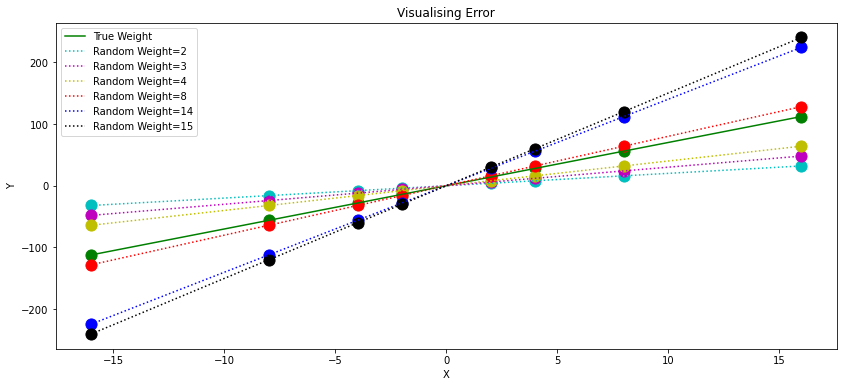

In [11]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(14,6))
ax=fig.add_subplot(111)

ax.scatter(X, Y, color='g', s=124)
ax.plot(X, Y, linestyle='solid', color='g', label="True Weight")


r_pred_colors = ['c', 'm', 'y', 'r', 'b', 'k']
for pred,col in zip(r_predictions,r_pred_colors):
    ax.scatter(X, pred, color=col, s=124)
    ax.plot(X, pred, linestyle=':', color=col, label="Random Weight="+str(random_weights[r_pred_colors.index(col)]))

plt.legend(loc="upper left")
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Visualising Error')
plt.show()

### Section 3: Can we quantify the error?  -- Calculate Error and Loss

In [12]:
import math

In [13]:
def calculate_error(prediction,target):
    error = []
    for p,tgt in zip(prediction,target):
        err = (tgt-p)**2       # Question: Why do we need to square?
        error.append(err)
    return error

In [14]:
r_errors = []
for pred in r_predictions:
    r_errors.append(calculate_error(pred,Y))
r_errors

[[6400, 1600, 400, 100, 100, 400, 1600, 6400],
 [4096, 1024, 256, 64, 64, 256, 1024, 4096],
 [2304, 576, 144, 36, 36, 144, 576, 2304],
 [256, 64, 16, 4, 4, 16, 64, 256],
 [12544, 3136, 784, 196, 196, 784, 3136, 12544],
 [16384, 4096, 1024, 256, 256, 1024, 4096, 16384]]

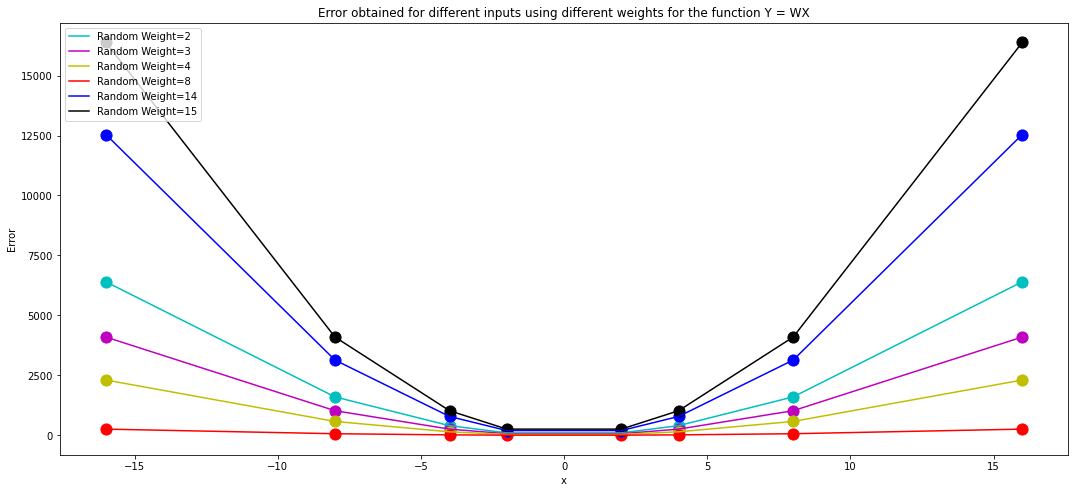

In [15]:
fig2=plt.figure(figsize=(14,6))
ax2=fig2.add_axes([0,0,1,1])


xs, ys = zip(*sorted(zip(X, r_errors[0])))  # sorting for better line plot -- https://stackoverflow.com/a/37415568/530399
ax2.scatter(xs, ys, color='c', s=124)
ax2.plot(xs, ys, linestyle='solid', color='c', label="Random Weight="+str(random_weights[0]))

xs, ys = zip(*sorted(zip(X, r_errors[1])))
ax2.scatter(xs, ys, color='m', s=124)
ax2.plot(xs, ys, linestyle='solid', color='m', label="Random Weight="+str(random_weights[1]))

xs, ys = zip(*sorted(zip(X, r_errors[2])))
ax2.scatter(xs, ys, color='y', s=124)
ax2.plot(xs, ys, linestyle='solid', color='y', label="Random Weight="+str(random_weights[2]))

xs, ys = zip(*sorted(zip(X, r_errors[3])))
ax2.scatter(xs, ys, color='r', s=124)
ax2.plot(xs, ys, linestyle='solid', color='r', label="Random Weight="+str(random_weights[3]))

xs, ys = zip(*sorted(zip(X, r_errors[4])))
ax2.scatter(xs, ys, color='b', s=124)
ax2.plot(xs, ys, linestyle='solid', color='b', label="Random Weight="+str(random_weights[4]))

xs, ys = zip(*sorted(zip(X, r_errors[5])))
ax2.scatter(xs, ys, color='k', s=124)
ax2.plot(xs, ys, linestyle='solid', color='k', label="Random Weight="+str(random_weights[5]))


plt.legend(loc="upper left")

ax2.set_xlabel('x')
ax2.set_ylabel('Error')
ax2.set_title('Error obtained for different inputs using different weights for the function Y = WX')
plt.show()

In [16]:
def calculate_loss(prediction,target):
    error = calculate_error(prediction,target)
    avg_loss = sum(error) / len(error)
    return avg_loss

In [17]:
r_losses = []
for pred in r_predictions:
    r_losses.append(calculate_loss(pred,Y))
r_losses

[2125.0, 1360.0, 765.0, 85.0, 4165.0, 5440.0]

In [18]:
data2 = [["Example Number","X","Y", "Prediction", "Error"],
        ["i=1",-16,-112,-128, 256],
        ["i=2",-8,-56,-64, 64],
        ["i=3",-4,-28,-32, 16],
        ["i=4",-2,-14,-16, 4],
        ["i=5",2,14,16, 4],
        ["i=6",4,28,32, 16],
        ["i=7",8,56,64, 64],
        ["i=8",16,112,128, 256],
        ]
print("Random Weight = 8")
print(tabletext.to_text(data2))
print("Loss = 85.0")

Random Weight = 8
┌────────────────┬─────┬──────┬────────────┬───────┐
│ Example Number │ X   │ Y    │ Prediction │ Error │
├────────────────┼─────┼──────┼────────────┼───────┤
│ i=1            │ -16 │ -112 │       -128 │   256 │
├────────────────┼─────┼──────┼────────────┼───────┤
│ i=2            │  -8 │  -56 │        -64 │    64 │
├────────────────┼─────┼──────┼────────────┼───────┤
│ i=3            │  -4 │  -28 │        -32 │    16 │
├────────────────┼─────┼──────┼────────────┼───────┤
│ i=4            │  -2 │  -14 │        -16 │     4 │
├────────────────┼─────┼──────┼────────────┼───────┤
│ i=5            │   2 │   14 │         16 │     4 │
├────────────────┼─────┼──────┼────────────┼───────┤
│ i=6            │   4 │   28 │         32 │    16 │
├────────────────┼─────┼──────┼────────────┼───────┤
│ i=7            │   8 │   56 │         64 │    64 │
├────────────────┼─────┼──────┼────────────┼───────┤
│ i=8            │  16 │  112 │        128 │   256 │
└────────────────┴─────┴────

In [19]:
%%latex
$Error_{i,k} = (y_i - (w_k * x_i))^2\ \ \ \ \ \ \ \ \ \ 
  Loss_k = \frac{1}{n}\sum_{i=1}^{n} Error_{i,k} $

<IPython.core.display.Latex object>

### Section 4: Let the machine do the guessing  -- Gradient Descent

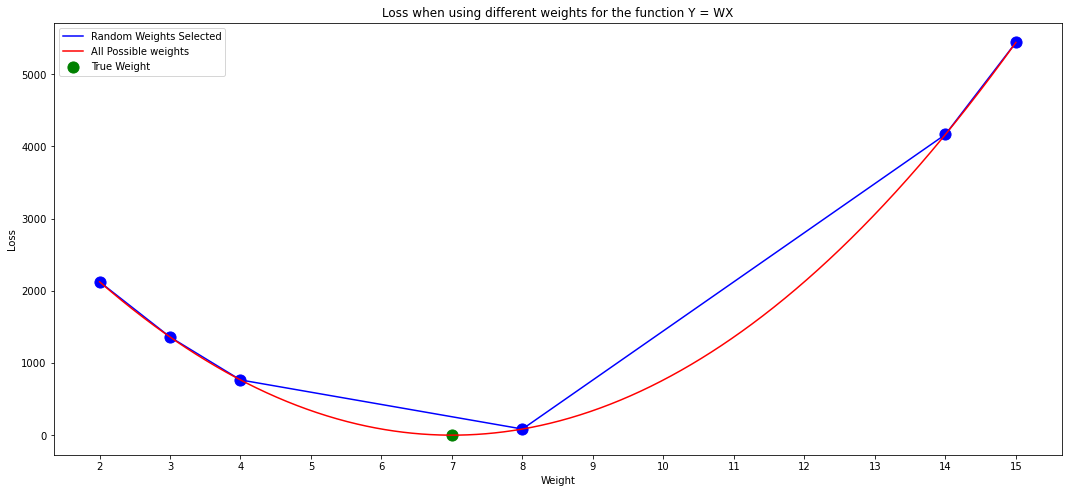

In [20]:
fig3=plt.figure(figsize=(14,6))
ax3=fig3.add_axes([0,0,1,1])

ax3.scatter(random_weights, r_losses, color='b', s=124)
ax3.plot(random_weights, r_losses, linestyle='solid', color='b', label="Random Weights Selected")

ax3.scatter(true_weight, 0, color='g', s=124, label="True Weight")


all_weights = np.linspace(2, 15, 1000)
all_losses = [calculate_loss(pred,Y) for pred in [get_prediction(X,wt) for wt in all_weights]]
ax3.plot(all_weights, all_losses, linestyle='solid', color='r', label="All Possible weights")


plt.legend(loc="upper left")

ax3.set_xlabel('Weight')
ax3.set_ylabel('Loss')
ax3.set_title('Loss when using different weights for the function Y = WX')

plt.xticks(np.arange(min(random_weights), max(random_weights)+1, 1.0))
plt.show()

In [21]:
data3 = [["W1","L1", "W2","L2", "dW = W2-W1","dL = L2-L1", "gradient = dL/dW"],
        [2, 2125, 3, 1360, 1, -765, -765],
        [3, 1360, 4, 765, 1, -595, -595],
        [4, 765, 8, 85, 4, -680, -170],
        [8, 85, 14, 4165, 6, 4080, 680],
        [14, 4165, 15, 5440, 1, 1275, 1275],
        ]
print(tabletext.to_text(data3))

┌────┬──────┬────┬──────┬────────────┬────────────┬──────────────────┐
│ W1 │ L1   │ W2 │ L2   │ dW = W2-W1 │ dL = L2-L1 │ gradient = dL/dW │
├────┼──────┼────┼──────┼────────────┼────────────┼──────────────────┤
│  2 │ 2125 │  3 │ 1360 │          1 │       -765 │             -765 │
├────┼──────┼────┼──────┼────────────┼────────────┼──────────────────┤
│  3 │ 1360 │  4 │  765 │          1 │       -595 │             -595 │
├────┼──────┼────┼──────┼────────────┼────────────┼──────────────────┤
│  4 │  765 │  8 │   85 │          4 │       -680 │             -170 │
├────┼──────┼────┼──────┼────────────┼────────────┼──────────────────┤
│  8 │   85 │ 14 │ 4165 │          6 │       4080 │              680 │
├────┼──────┼────┼──────┼────────────┼────────────┼──────────────────┤
│ 14 │ 4165 │ 15 │ 5440 │          1 │       1275 │             1275 │
└────┴──────┴────┴──────┴────────────┴────────────┴──────────────────┘


In [22]:
gradients = {}
for idx in range(len(r_losses)-1):
    w1 = random_weights[idx]
    l1 = r_losses[idx]
    w2 = random_weights[idx+1]
    l2 = r_losses[idx+1]
    gradients[w1] = (l2-l1)/(w2-w1)
print (gradients)

{2: -765.0, 3: -595.0, 4: -170.0, 8: 680.0, 14: 1275.0}


In [23]:
alpha = 0.001
def get_better_weight_numerical(input_weight, alpha=1):
    out_weight = input_weight - alpha*gradients[input_weight]
    return out_weight

In [24]:
get_better_weight_numerical(8)

-672.0

In [25]:
get_better_weight_numerical(8, alpha)

7.32

In [26]:
for idx in range(len(random_weights)-1):
    org_wgt = random_weights[idx]
    new_wgt = get_better_weight_numerical(org_wgt, alpha)
    print("Better weight estimate for "+str(org_wgt)+" is "+str(new_wgt))

Better weight estimate for 2 is 2.765
Better weight estimate for 3 is 3.5949999999999998
Better weight estimate for 4 is 4.17
Better weight estimate for 8 is 7.32
Better weight estimate for 14 is 12.725


In [27]:
%%latex
The derivative of the loss function, $\frac{d}{dw_k}Loss_k$ = $\frac{2}{n}\sum_{i=1}^{n} ((w_k*x_i-y_i)*x_i)$. Check at https://www.derivative-calculator.net/#expr=%28y-wx%29%5E2&diffvar=w&showsteps=1

<IPython.core.display.Latex object>

In [28]:
def gradient_fn(input_weight):
    gradient = 0
    for x_i,y_i in zip(X,Y):
        gradient = gradient + (input_weight*x_i - y_i)*x_i
    return (2.00*gradient)/len(Y)
        
def get_better_weight_algebraic(input_weight, alpha=1):
    out_weight = input_weight - alpha*gradient_fn(input_weight)
    return out_weight

### Section 5: Training

In [29]:
# Iterate until the loss is minimised
start_weight = 14

# start_weight = 147
# start_weight = 147

start_loss = calculate_loss(get_prediction(X,start_weight),Y)
print("Start weight = "+str(start_weight)+", start loss = "+str(start_loss))

updated_weight = start_weight
updated_loss = start_loss
while updated_loss>0.5:
    updated_weight = get_better_weight_algebraic(updated_weight, alpha)
    updated_loss = calculate_loss(get_prediction(X,updated_weight),Y)
    print("Updated weight = "+str(updated_weight)+", updated loss = "+str(updated_loss))

# or you could also iterate for a fixed number of epochs -- because you wouldn't know what the ideal threshold for updated_loss is! Also possible to do early stopping -- keep updating the weights (i.e. train) as long as the loss on validation data keeps on decreasing.

Start weight = 14, start loss = 4165.0
Updated weight = 12.81, updated loss = 2869.2685000000006
Updated weight = 11.8223, updated loss = 1976.6390696500002
Updated weight = 11.002509, updated loss = 1361.706655081885
Updated weight = 10.32208247, updated loss = 938.0797146859104
Updated weight = 9.7573284501, updated loss = 646.2431154471235
Updated weight = 9.288582613583, updated loss = 445.1968822315233
Updated weight = 8.899523569273889, updated loss = 306.6961321692962
Updated weight = 8.576604562497328, updated loss = 211.28296545142834
Updated weight = 8.308581786872782, updated loss = 145.55283489948891
Updated weight = 8.086122883104409, updated loss = 100.2713479622578
Updated weight = 7.9014819929766595, updated loss = 69.07693161119946
Updated weight = 7.7482300541706275, updated loss = 47.587098186955316
Updated weight = 7.621030944961621, updated loss = 32.78275194099355
Updated weight = 7.5154556843181455, updated loss = 22.58403781215045
Updated weight = 7.427828217984

In [30]:
prediction = updated_weight * test_data
prediction

array([226.12422408])

### (Mini)batch gradient descent; Stochastic gradient descent; online gradient descent

In [31]:
def get_better_weight_algebraic_stochastic(input_weight, alpha=1):
    out_weight = input_weight
    for x_i,y_i in zip(X,Y):
        current_gradient = 2.00*(input_weight*x_i - y_i)*x_i
        out_weight = out_weight - alpha*current_gradient
    return out_weight

In [32]:
start_loss = calculate_loss(get_prediction(X,start_weight),Y)
print("Start weight = "+str(start_weight)+", start loss = "+str(start_loss))

updated_weight = start_weight
updated_loss = start_loss
while updated_loss>0.15:
    updated_weight = get_better_weight_algebraic_stochastic(updated_weight, alpha)
    updated_loss = calculate_loss(get_prediction(X,updated_weight),Y)
    print("Updated weight = "+str(updated_weight)+", updated loss = "+str(updated_loss))

Start weight = 14, start loss = 4165.0
Updated weight = 4.48, updated loss = 539.7839999999999
Updated weight = 7.9072, updated loss = 69.95600639999992
Updated weight = 6.673408, updated loss = 9.066298429439986
Updated weight = 7.117573119999999, updated loss = 1.1749922764554126
Updated weight = 6.957673676800001, updated loss = 0.15227899902861786
Updated weight = 7.015237476351999, updated loss = 0.019735358274106114


In [33]:
prediction = updated_weight * test_data
prediction

array([224.48759924])

## HW: 

Study about "bias". Bias is a learnable parameter just like the weight parameter that we saw. Think why would we need bias. How about regularization?